In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nrhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv("../Ressources/scenarii.csv", encoding="ISO-8859-1", sep=";", header=0)

In [4]:
df_class_1_training = df[df['tag'] == 1]
df_class_2_training = df[df['tag'] == 2]
df_class_3_training = df[df['tag'] == 3]
df_class_4_training = df[df['tag'] == 4]
df_class_5_training = df[df['tag'] == 5]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

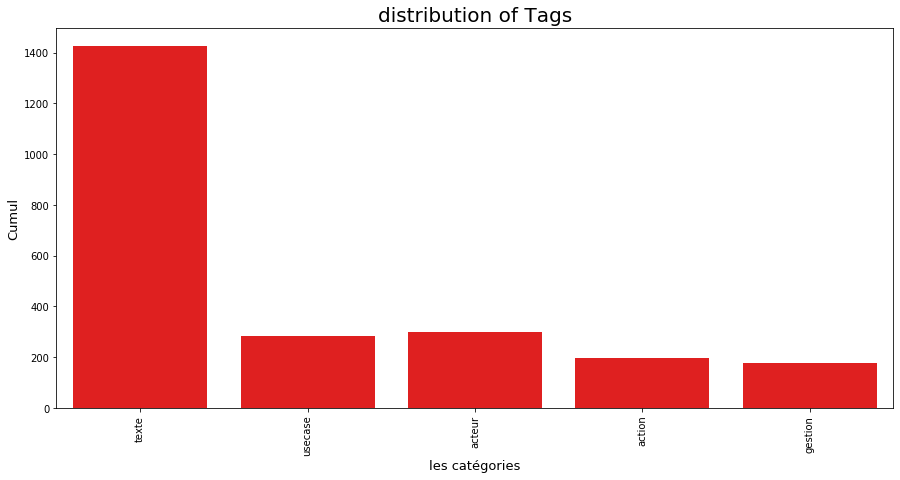

In [5]:
tags1= df['tag']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.countplot(x= tags1, color='red')
plt.title('distribution of Tags', fontsize=20)
plt.ylabel('Cumul', fontsize=13)
plt.xlabel('les catégories', fontsize=13)
plt.xticks(rotation='vertical')

In [30]:
dfTraining = pd.read_csv("../Ressources/scenarii1_training.csv", encoding="ISO-8859-1", sep=";", header=0)
dfTesting = pd.read_csv("../Ressources/scenarii1_testing.csv", encoding="ISO-8859-1", sep=";", header=0)
df_class_1_training = dfTraining[dfTraining['tag'] == 1]
df_class_2_training = dfTraining[dfTraining['tag'] == 2]
df_class_3_training = dfTraining[dfTraining['tag'] == 3]
df_class_4_training = dfTraining[dfTraining['tag'] == 4]
df_class_5_training = dfTraining[dfTraining['tag'] == 5]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

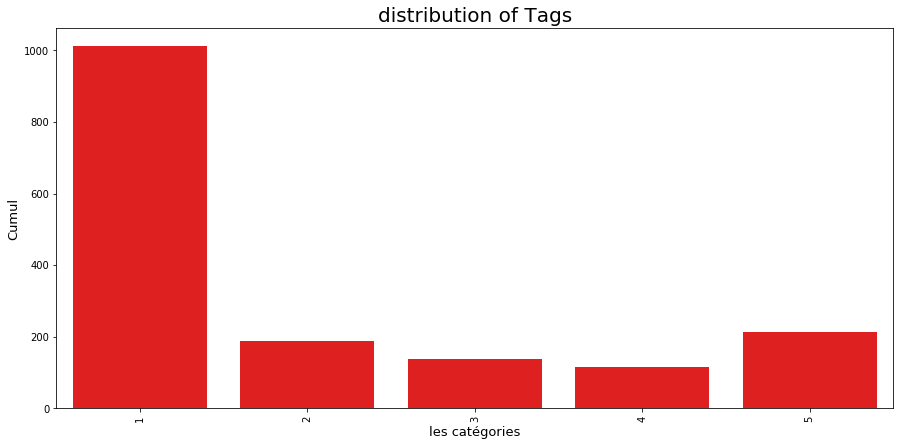

In [31]:
tags1= dfTraining['tag']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.countplot(x= tags1, color='red')
plt.title('distribution of Tags', fontsize=20)
plt.ylabel('Cumul', fontsize=13)
plt.xlabel('les catégories', fontsize=13)
plt.xticks(rotation='vertical')

In [33]:
# Downsample majority class
df_majority_downsampled_Training = resample(df_class_1, 
                                 replace=False,    # sample without replacement
                                 n_samples=213)     # to match minority class
                                 # reproducible results

In [34]:
# Combine minority class with downsampled majority class
df_downsampled_Training = pd.concat([df_majority_downsampled_Training, df_class_2, df_class_3, df_class_4, df_class_5])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['texte'], df['tag'])

In [7]:
from sklearn.utils import resample
df = pd.read_csv("../Ressources/scenarii.csv", encoding="ISO-8859-1", sep=";", header=0)
tags = df['tag']
data = CountVectorizer().fit_transform(df['texte']).toarray()
#Commenter cette ligne pour avoir les occurences, et enlever le commentaire pour avoir les scores TF-IDF
data = TfidfTransformer().fit_transform(data).toarray()
# Separate majority and minority classes
df_class_1 = df[df['tag'] == 1]
df_class_2 = df[df['tag'] == 2]
df_class_3 = df[df['tag'] == 3]
df_class_4 = df[df['tag'] == 4]
df_class_5 = df[df['tag'] == 5]

In [6]:
from sklearn.utils import resample

train_text = pd.read_csv('../Ressources/separated_data/scenarii_training_text.csv', encoding="ISO-8859-1")
train_tags = pd.read_csv('../Ressources/separated_data/scenarii_training_tags1.csv', encoding="ISO-8859-1")
test_text = pd.read_csv('../Ressources/separated_data/scenarii_testing_text.csv', encoding="ISO-8859-1")
test_tags = pd.read_csv('../Ressources/separated_data/scenarii_testing_tags1.csv', encoding="ISO-8859-1")


df = pd.read_csv("../Ressources/scenarii1.csv", encoding="ISO-8859-1", sep=";", header=0)
tags = df['tag']
data = CountVectorizer().fit_transform(df['texte']).toarray()
#Commenter cette ligne pour avoir les occurences, et enlever le commentaire pour avoir les scores TF-IDF
data = TfidfTransformer().fit_transform(data).toarray()



In [7]:
print(df_class_1)

                                                  texte  tag
0     4.\tVersion Desktop - liste des cas d'utilisat...    1
3     Cas dutilisation permettant à un internaute  ...    1
4     \tNotes :\nLe système affiche les éléments su...    1
8     Cas dutilisation permettant à un internaute  ...    1
9     \tNotes :\nLe système affiche :\nla langue sé...    1
...                                                 ...  ...
2374  Cas dutilisation décrivant la consultation du...    1
2375  \tNotes :\nLe système affiche 2 menus déroula...    1
2378           5.10.2.b\tAfficher la liste des parcours    1
2380  Cas dutilisation décrivant la consultation de...    1
2381  \tNotes :\nLe système affiche la liste des pa...    1

[1427 rows x 2 columns]


In [9]:
print(df_class_5)

                                       texte  tag
2                        Acteur : Internaute    5
7                        Acteur : Internaute    5
13                       Acteur : Internaute    5
17    Acteur : Administrateur / Contributeur    5
21                       Acteur : Internaute    5
...                                      ...  ...
2355                     Acteur : Internaute    5
2361                     Acteur : Internaute    5
2367                     Acteur : Internaute    5
2373                     Acteur : Internaute    5
2379                     Acteur : Internaute    5

[299 rows x 2 columns]


In [10]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_class_1, 
                                 replace=False,    # sample without replacement
                                 n_samples=299)     # to match minority class
                                 # reproducible results

In [11]:
print(df_majority_downsampled)

                                                  texte  tag
724   A la sélection dun panier existant, le systèm...    1
1738  Cas dutilisation décrivant la consultation d...    1
2289  Cas dutilisation décrivant la consultation d...    1
330   Nom du champ\t\tType de champ\tobligatoire\tCo...    1
1582  Actions\n\tLes champs concernés par les rebon...    1
...                                                 ...  ...
145                     Les champs propres à la vidéo :    1
547   Cette page est affichée automatiquement et ne ...    1
1895  \tRègles de gestion\nUn évènement saffiche d...    1
2042  \tNotes\nLe système affiche le bloc En savoir...    1
1123  Pour contribuer un sous-élément de type docume...    1

[299 rows x 2 columns]


In [12]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_class_2, df_class_3, df_class_4, df_class_5])

In [13]:
print(df_downsampled)

                                                  texte  tag
724   A la sélection dun panier existant, le systèm...    1
1738  Cas dutilisation décrivant la consultation d...    1
2289  Cas dutilisation décrivant la consultation d...    1
330   Nom du champ\t\tType de champ\tobligatoire\tCo...    1
1582  Actions\n\tLes champs concernés par les rebon...    1
...                                                 ...  ...
2355                                Acteur : Internaute    5
2361                                Acteur : Internaute    5
2367                                Acteur : Internaute    5
2373                                Acteur : Internaute    5
2379                                Acteur : Internaute    5

[1254 rows x 2 columns]


In [14]:
data = CountVectorizer().fit_transform(df['texte']).toarray()
#Commenter cette ligne pour avoir les occurences, et enlever le commentaire pour avoir les scores TF-IDF
data = TfidfTransformer().fit_transform(data).toarray()
clf = svm.SVC(kernel='linear', C=1)
scoring = {'accuracy': 'accuracy',
           'prec': 'average_precision', 
           'recall': 'recall',
           'f1_macro': 'f1_macro'}
scores = cross_val_score(clf, data, tags, cv=5, scoring = 'f1_macro')
print(np.mean(scores))
scores = cross_val_score(clf, data, tags, cv=5, scoring = 'recall_macro')
print(np.mean(scores))
scores = cross_val_score(clf, data, tags, cv=5, scoring = 'precision_macro')
print(np.mean(scores))

0.9105579858100141
0.8987427718480351
0.9380797210238289


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(wv_train_feat, y_train)

NameError: name 'wv_train_feat' is not defined

In [19]:
data1 = CountVectorizer().fit_transform(df_downsampled['texte']).toarray()
tags1= df_downsampled['tag']
#Commenter cette ligne pour avoir les occurences, et enlever le commentaire pour avoir les scores TF-IDF
data1 = TfidfTransformer().fit_transform(data1).toarray()
clf = svm.SVC(kernel='linear', C=1)
scoring = {'accuracy': 'accuracy',
           'prec': 'average_precision', 
           'recall': 'recall',
           'f1_macro': 'f1_macro'}
scores = cross_val_score(clf, data1, tags1, cv=5, scoring = 'f1_macro')
print(np.mean(scores))
scores = cross_val_score(clf, data1, tags1, cv=5, scoring = 'recall_macro')
print(np.mean(scores))
scores = cross_val_score(clf, data1, tags1, cv=5, scoring = 'precision_macro')
print(np.mean(scores))

0.9452993604980184
0.946837158084259
0.9474280743742703


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

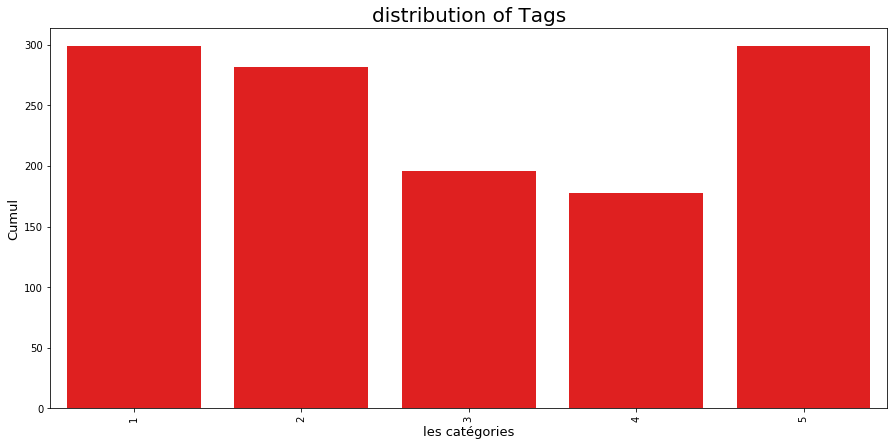

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.countplot(x= tags1, color='red')
plt.title('distribution of Tags', fontsize=20)
plt.ylabel('Cumul', fontsize=13)
plt.xlabel('les catégories', fontsize=13)
plt.xticks(rotation='vertical')